In [ ]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize']=15,6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/Yahoo_Finance.csv')  
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-31,10.56,10.87,10.50,10.63,10.033685,45900
1,2012-11-01,10.71,11.41,10.59,11.22,10.590586,66400
2,2012-11-02,11.22,11.22,10.83,10.85,10.241342,38600
3,2012-11-05,10.99,11.40,10.86,11.27,10.637783,48600
4,2012-11-06,11.27,11.44,11.14,11.43,10.788806,28200


In [ ]:
dataset['Date']=pd.to_datetime(dataset['Date'], infer_datetime_format=True)
dataset.to_csv("outputp.csv", index=False)
indexDataset = dataset.set_index(['Date'])

In [ ]:
indexDataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-10-31,10.560000,10.870000,10.500000,10.630000,10.033685,45900
2012-11-01,10.710000,11.410000,10.590000,11.220000,10.590586,66400
2012-11-02,11.220000,11.220000,10.830000,10.850000,10.241342,38600
2012-11-05,10.990000,11.400000,10.860000,11.270000,10.637783,48600
2012-11-06,11.270000,11.440000,11.140000,11.430000,10.788806,28200
...,...,...,...,...,...,...
2019-10-22,21.629999,21.790001,21.379999,21.389999,21.389999,39100
2019-10-23,21.400000,21.530001,21.370001,21.459999,21.459999,67100
2019-10-24,21.600000,21.639999,21.400000,21.600000,21.600000,74300


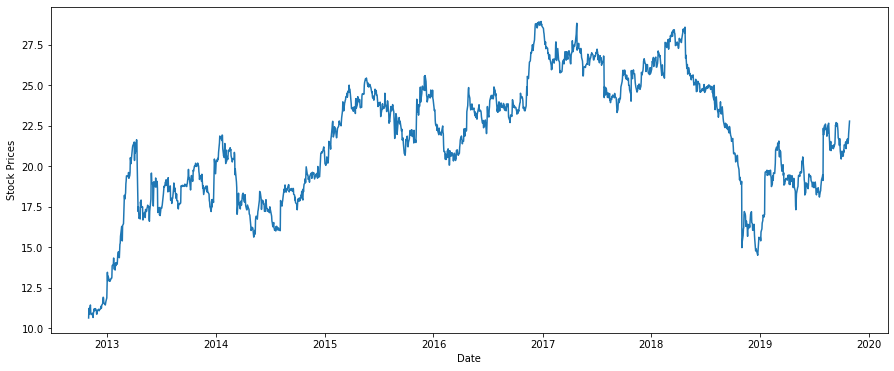

In [ ]:
plt.xlabel("Date")
plt.ylabel("Stock Prices")
plt.plot(indexDataset['Close'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


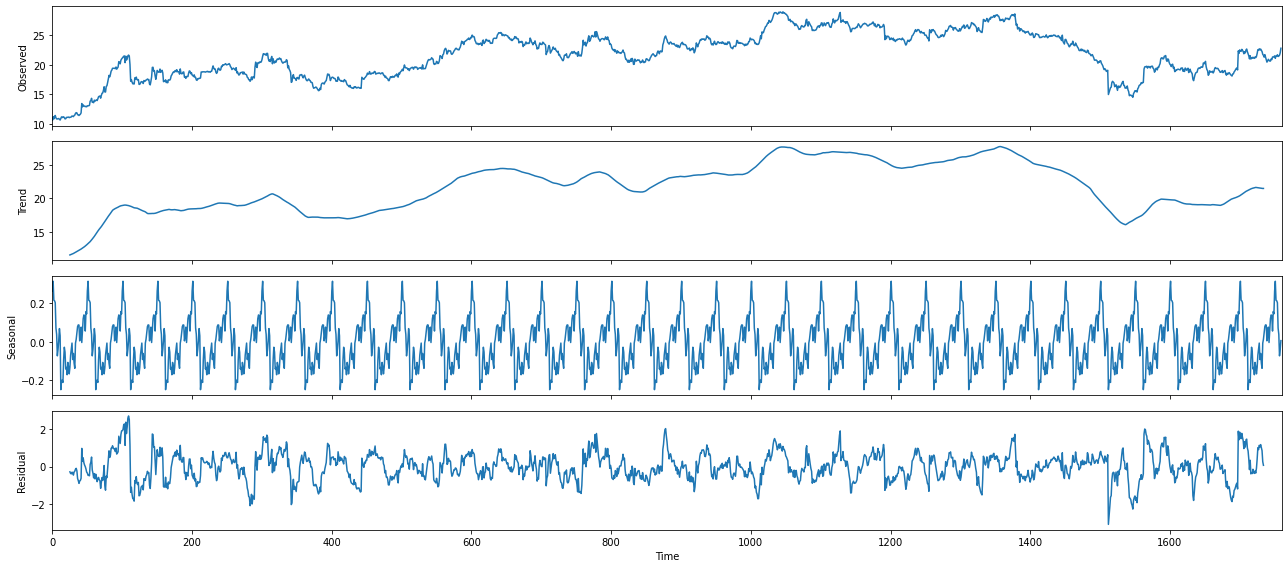

In [ ]:
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(indexDataset['Close'].values, model='additive',freq = 50)
fig = decomposition.plot()
plt.show()

In [ ]:
indexDataset.shift(1)
indexed_diff = indexDataset.diff(periods=1)
indexed_diff = indexed_diff[1:]
indexed_diff.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-11-01,0.15,0.54,0.09,0.59,0.556901,20500.0
2012-11-02,0.51,-0.19,0.24,-0.37,-0.349244,-27800.0
2012-11-05,-0.23,0.18,0.03,0.42,0.396441,10000.0
2012-11-06,0.28,0.04,0.28,0.16,0.151023,-20400.0
2012-11-07,0.15,-0.02,-0.12,-0.40,-0.377558,16400.0


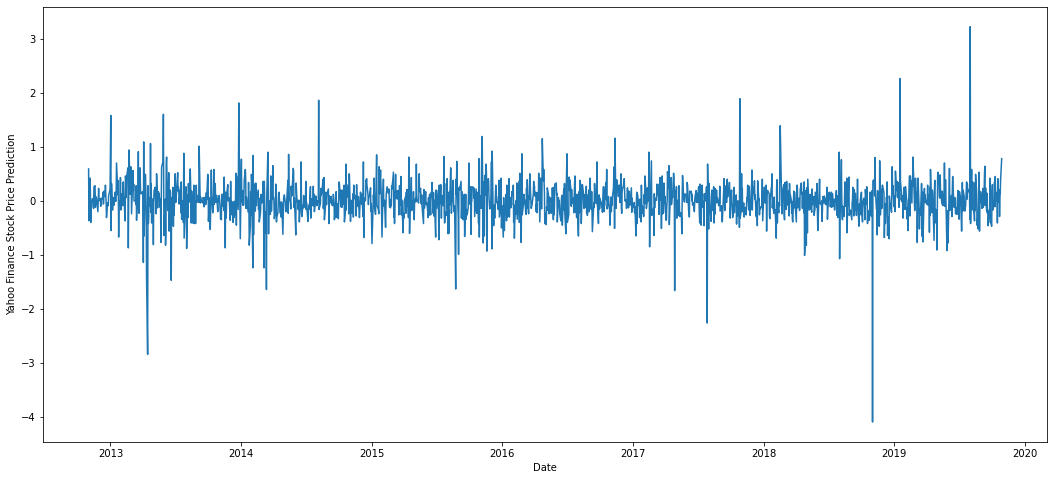

In [ ]:
plt.xlabel("Date")
plt.ylabel("Yahoo Finance Stock Price Prediction")
plt.plot(indexed_diff['Close'])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from sklearn.model_selection import train_test_split 

X = indexDataset['Close'].values
train = X[0:1450]# train data
test = X[1450:]                 
predictions = []

In [ ]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(2,1,2))
model_arima_fit = model_arima.fit(disp=-1)

In [ ]:
predictions= model_arima_fit.forecast(steps=310)[0]

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

30.893111919071828

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_set_rmse = (np.sqrt(mean_squared_error(test, predictions)))
test_set_r2 = r2_score(test, predictions)

In [ ]:
print(test_set_rmse)

5.5581572413050555


In [ ]:
print(test_set_r2)

-5.445229981721867
